# 5.시계열 데이터 분석과 데이터 시각화 plotting 기능 활용1
2021-06-06

<li>영우 글로벌 러닝 판다스 보충강의 5</li>
<li>시계열 데이터 분석과 데이터 시각화 plotting 기능 활용1</li>
<li><a href = https://www.youtube.com/watch?v=AyJGOw1jgbc>강의 유튜브 링크</a>

In [1]:
# expanding()
# 요약기능을 허용하는 확장개체를 누적 정용하여 반환
# 확장된 변형제공
# 누적된 변경값 정보 제공

# rolling(n)
# 요약기능 허용하는 rolling 객체를 길이 n개의 창(windows)에 적용하여 반환
# 이동평균을 구할 때 사용

In [72]:
# import

import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제 대처
mpl.rcParams["axes.unicode_minus"] = False

2015-01-01   -0.612705
2015-01-02   -1.493382
2015-01-03    0.724738
2015-01-04   -0.958045
2015-01-05    0.674888
                ...   
2017-09-22   -0.783418
2017-09-23    1.135135
2017-09-24    1.330407
2017-09-25    2.593630
2017-09-26   -0.089933
Freq: D, Length: 1000, dtype: float64


<AxesSubplot:>

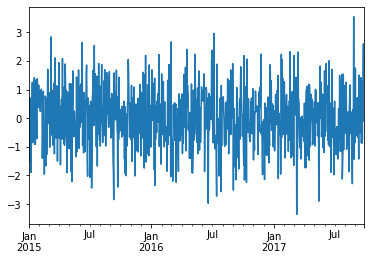

In [12]:
s = pd.Series(np.random.randn(1000), 
              index = pd.date_range("1/1/2015", periods = 1000))
print(s)
s.plot()

<AxesSubplot:>

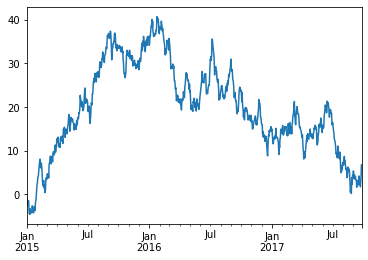

In [13]:
s = s.cumsum()
s.plot()

In [16]:
# rolling
# 이동평균 구할 때 사용

r = s.rolling(window = 30)
r

Rolling [window=30,center=False,axis=0]

In [ ]:
# 이동평균 ?

# 시계열의 각 항에 대하여 그것을 중심으로 하는 
# 전후 일정 항 수(window)의 평균값을 연결하여 경향선을 구하는 방법. 

# 이 방법은 이해하기가 쉽고 계산이 쉬운 반면에 
# 항수에 대한 일정한 규칙이 없어 항수에 따라 그 결과가 달라질 수 있으며, 
# 첫 항과 끝 항의 추세값을 계산할 수 없으므로 
# 최근의 추세선을 구하기 어려운 단점이 있다.

In [18]:
r.mean()

2015-01-01         NaN
2015-01-02         NaN
2015-01-03         NaN
2015-01-04         NaN
2015-01-05         NaN
                ...   
2017-09-22    3.169347
2017-09-23    3.238005
2017-09-24    3.363837
2017-09-25    3.583337
2017-09-26    3.681713
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

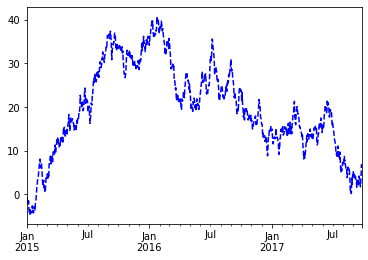

In [19]:
s.plot(style = "b--")

<AxesSubplot:>

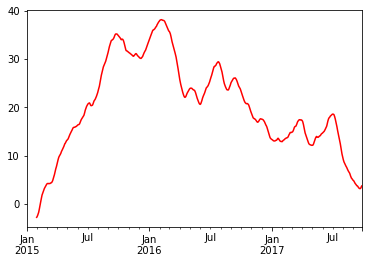

In [20]:
r.mean().plot(style = "r")

<AxesSubplot:>

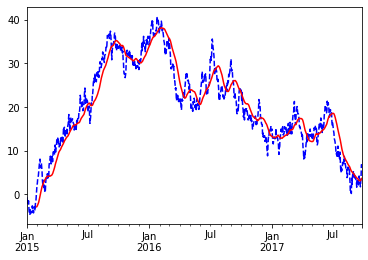

In [22]:
# 이동평균
s.plot(style = "b--")
r.mean().plot(style = "r")

In [24]:
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index = pd.date_range("1/1/2015", periods = 1000),
                  columns = ["A", "B", "C", "D"])
df = df.cumsum()
df

,A,B,C,D
2015-01-01,1.431209,-1.198428,-2.351362,-0.227498
2015-01-02,-0.262602,-1.444341,-1.677844,0.089680
2015-01-03,1.348483,-1.247682,-1.803870,-0.353144
2015-01-04,1.470692,-1.745378,-1.561867,1.427199
2015-01-05,1.820932,-1.629761,-2.674908,1.796686
...,...,...,...,...
2017-09-22,32.299517,18.598824,6.951819,-18.990684
2017-09-23,33.335002,17.684574,6.154797,-17.652647
2017-09-24,34.558513,16.337988,7.817473,-17.029773
2017-09-25,34.827690,16.139195,8.868255,-17.094755


<AxesSubplot:>

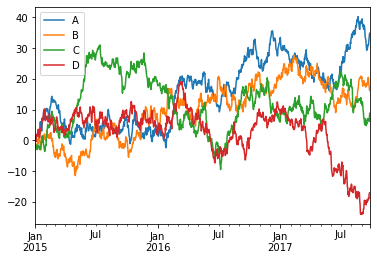

In [25]:
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

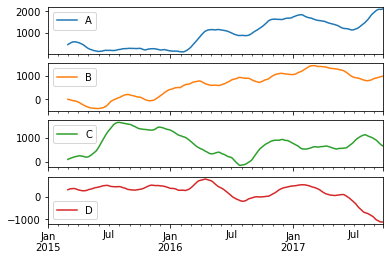

In [43]:
df.rolling(window = 60).sum().plot(subplots = True)

<AxesSubplot:>

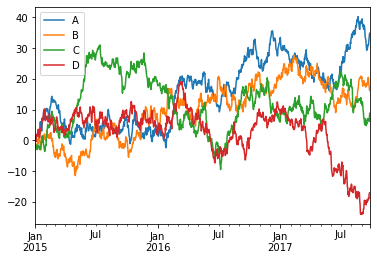

In [46]:
df.rolling(window = 1, min_periods = 1).mean().plot()
# window : 1000개를 보겠다는것.

<AxesSubplot:>

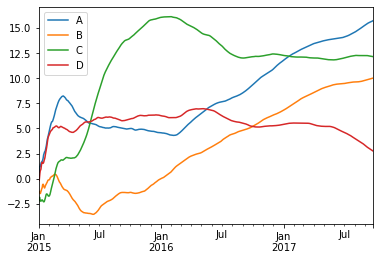

In [57]:
df.rolling(window = len(df), min_periods = 1).mean().plot()
# 전후로 1000개를 보겠다는것.
# 관측치의 최소를 min_periods로 잡음


In [59]:
# expanding ()
# 확장된 변형 제공
# 누적된 변경 값의 정보 제공

df.expanding(min_periods = 1).mean()

,A,B,C,D
2015-01-01,1.431209,-1.198428,-2.351362,-0.227498
2015-01-02,0.584303,-1.321385,-2.014603,-0.068909
2015-01-03,0.839030,-1.296817,-1.944359,-0.163654
2015-01-04,0.996945,-1.408957,-1.848736,0.234059
2015-01-05,1.161743,-1.453118,-2.013970,0.546584
...,...,...,...,...
2017-09-22,15.677701,9.993411,12.169689,2.810458
2017-09-23,15.695412,10.001125,12.163656,2.789933
2017-09-24,15.714313,10.007475,12.159301,2.770074
2017-09-25,15.733445,10.013613,12.156007,2.750189


In [61]:
dfe = pd.DataFrame({"B" : [0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


<AxesSubplot:>

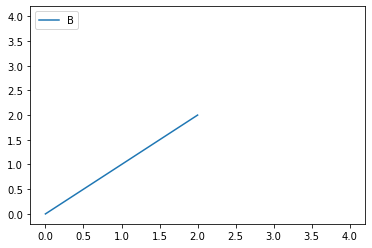

In [62]:
dfe.plot()

In [67]:
dfe.expanding(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


<AxesSubplot:>

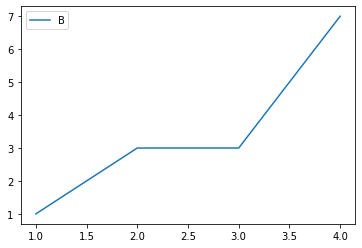

In [68]:
dfe.expanding(2).sum().plot()

In [70]:
dfe.expanding(2).mean()

,B
0,NaN
1,0.50
2,1.00
3,1.00
4,1.75


In [73]:
# 데이터 시각화

# line , bar, harh(horizontal bar), hist, box, 
# kde(Kernel Density Estimation plot), density(same as "kde". 밀도함수),
# area(면적), pie, scatter, hexbin(산점도 개선)

<AxesSubplot:>

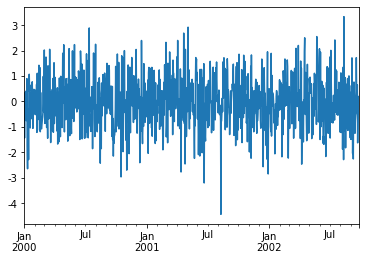

In [79]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range("1/1/2000", periods = 1000))
# random 한 1000개의 수를 
# 2000년 1월 1일부터 
# 1000일 동안 시계열 데이터 생성
ts.plot()

<AxesSubplot:>

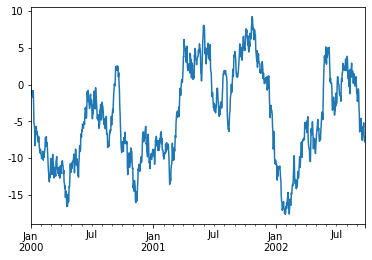

In [80]:
# cumsum
ts = ts.cumsum()
ts.plot()

In [81]:
df

,A,B,C,D
2015-01-01,1.431209,-1.198428,-2.351362,-0.227498
2015-01-02,-0.262602,-1.444341,-1.677844,0.089680
2015-01-03,1.348483,-1.247682,-1.803870,-0.353144
2015-01-04,1.470692,-1.745378,-1.561867,1.427199
2015-01-05,1.820932,-1.629761,-2.674908,1.796686
...,...,...,...,...
2017-09-22,32.299517,18.598824,6.951819,-18.990684
2017-09-23,33.335002,17.684574,6.154797,-17.652647
2017-09-24,34.558513,16.337988,7.817473,-17.029773
2017-09-25,34.827690,16.139195,8.868255,-17.094755


In [83]:
df = pd.DataFrame(np.random.randn(1000, 4),   # 1000개의 random 데이터, 4개의 열
                  index = ts.index, columns = list("ABCD"))
df

,A,B,C,D
2000-01-01,1.264199,0.027643,-0.799423,1.932624
2000-01-02,1.040894,0.762154,-0.117063,0.298413
2000-01-03,-0.883355,-0.914590,-1.377790,1.148540
2000-01-04,1.308198,0.615667,-0.183425,0.495779
2000-01-05,2.122664,-0.789812,-1.779508,0.239572
...,...,...,...,...
2002-09-22,0.767395,-0.805480,-1.726011,-1.353638
2002-09-23,0.456870,-0.380804,0.071300,0.893560
2002-09-24,0.406572,0.573294,0.165496,-0.009632
2002-09-25,-1.096061,-1.422694,-1.536102,-0.047379


<AxesSubplot:>

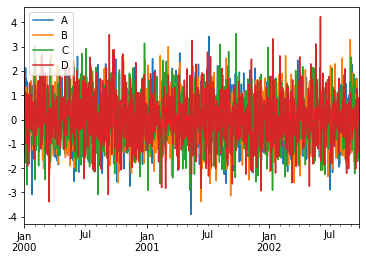

In [85]:
df.plot()

<AxesSubplot:>

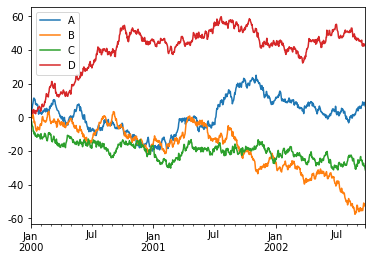

In [86]:
df = df.cumsum()
df.plot()

In [88]:
df3 = pd.DataFrame(np.random.randn(1000, 2), 
                   columns = ["B", "C"]).cumsum()
df3.head()

,B,C
0,-0.709787,0.667956
1,-3.252182,0.746551
2,-3.068421,-0.562611
3,-2.344857,-1.238559
4,-1.274494,-0.276321


In [91]:
df3["A"] = pd.Series(list(range(len(df))))
df3.head()

,B,C,A
0,-0.709787,0.667956,0
1,-3.252182,0.746551,1
2,-3.068421,-0.562611,2
3,-2.344857,-1.238559,3
4,-1.274494,-0.276321,4


<AxesSubplot:xlabel='A'>

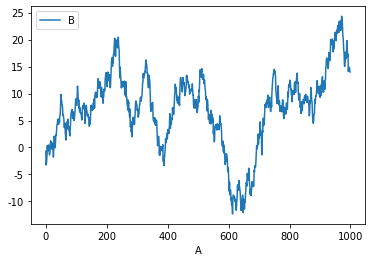

In [92]:
df3.plot(x = "A", y = "B")

In [94]:
# bar plot

# 표현 값에 비례하여 높이와 길이를 지닌 직사각형 막대
# 범주형 데이터 표현하는 그래프
# 수직 막대그래프를 선 그래프 혹은 라인 그래프라고도 함

In [95]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range("1/1/2000", periods = 1000))
ts.head()

2000-01-01   -1.093051
2000-01-02   -1.677676
2000-01-03   -1.947974
2000-01-04   -0.933785
2000-01-05   -0.162762
Freq: D, dtype: float64

In [97]:
df = pd.DataFrame(np.random.randn(1000, 4),
               index = ts.index, columns = list("ABCD"))
print(df.head())
df.tail()

                   A         B         C         D
2000-01-01 -1.004962  1.089308  1.930643  0.317495
2000-01-02  0.553349 -0.380306 -0.662306 -0.266976
2000-01-03  1.764288  0.132295  0.384257  0.571295
2000-01-04  0.267563 -0.260116  0.865468  0.218623
2000-01-05  1.665227  0.258476 -0.970443 -0.268709


,A,B,C,D
2002-09-22,-1.521021,-0.130970,2.082951,-0.348248
2002-09-23,-0.222643,0.446296,0.405737,-0.514602
2002-09-24,0.727593,-1.337581,-0.332820,-0.057872
2002-09-25,-0.468552,0.178570,-0.497034,1.001152
2002-09-26,-0.809377,-0.132140,1.921986,-1.186359


A    2.024521
B   -0.260667
C   -0.133553
D    0.304852
Name: 2000-01-06 00:00:00, dtype: float64


<AxesSubplot:>

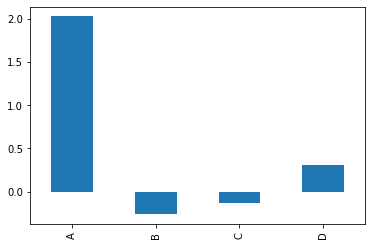

In [99]:
print(df.iloc[5])

df.iloc[5].plot(kind = "bar")

<AxesSubplot:>

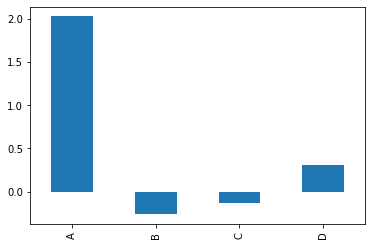

In [101]:
# 위와 동일
df.iloc[5].plot.bar()

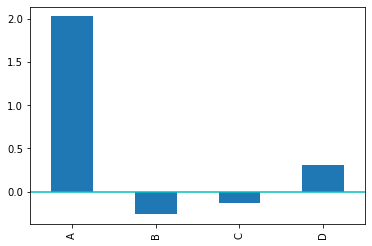

In [105]:
df.iloc[5].plot.bar()
plt.axhline(0, color = "c")  # k : 검정
# %matplotlib inline
# 0을 기준으로 라인을 그려줌
# cmyk, rgb 등 지정하여 선을 그릴 수 있음

In [108]:
df2 = pd.DataFrame(np.random.rand(10, 4), 
                   columns = list("abcd"))
df2.head()

,a,b,c,d
0,0.261779,0.708625,0.331791,0.190981
1,0.132754,0.599950,0.685969,0.433885
2,0.793322,0.043276,0.368768,0.520561
3,0.226862,0.380086,0.168909,0.103483
4,0.934356,0.131572,0.123826,0.741679


<AxesSubplot:>

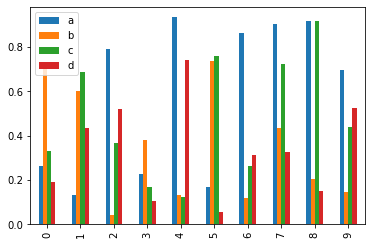

In [109]:
df2.plot.bar()

<AxesSubplot:>

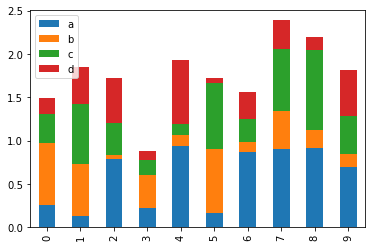

In [111]:
df2.plot.bar(stacked = True)

<AxesSubplot:>

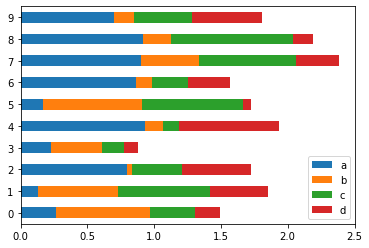

In [113]:
df2.plot.barh(stacked = True)

In [114]:
# histogram

# 연속형 자료
# 도수분포표를 시각화 하여 막대그래프로 표현
# 도수분포표 : 특정 구간에 속하는 자료의 개수를 표현한것
# 구간별 빈도수를 표현한것

# 정규분포(Density plot)
# 확률밀도 함수
# 확률변수의 밀도를 표현한것

In [119]:
df4 = pd.DataFrame({"a" : np.random.randn(1000) + 1, 
                    "b" : np.random.randn(1000), 
                    "c" : np.random.randn(1000) - 1}, 
                   columns = ["a", "b", "c"])
df4.head()

,a,b,c
0,2.508774,-0.389889,-1.142624
1,0.943674,-0.807388,-0.918352
2,-0.115673,-0.065657,-1.112583
3,0.987000,-1.592324,-0.921016
4,1.503007,1.809235,-1.146844


<AxesSubplot:ylabel='Frequency'>

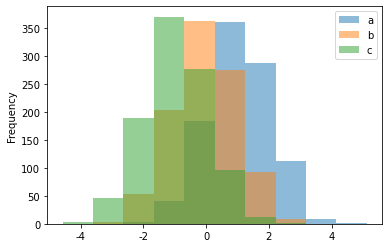

In [120]:
# bin : 범주. 기본값 10
df4.plot.hist(alpha = 0.5)

<AxesSubplot:ylabel='Frequency'>

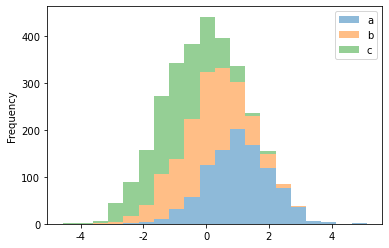

In [122]:
df4.plot.hist(stacked = True, bins = 20, alpha = 0.5)
# bins : 누적합. bin 값이 20개

<AxesSubplot:xlabel='Frequency'>

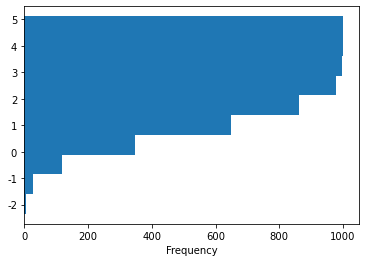

In [125]:
df4["a"].plot.hist(orientation = "horizontal", cumulative = True)
# cumulative : 누적해서 표현

<AxesSubplot:>

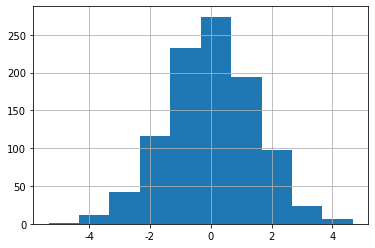

In [126]:
df4["a"].diff().hist()
# diff : 차분

In [129]:
df4["a_diff"] = df4["a"].diff()
df4[["a", "a_diff"]]

,a,a_diff
0,2.508774,NaN
1,0.943674,-1.565100
2,-0.115673,-1.059347
3,0.987000,1.102674
4,1.503007,0.516007
...,...,...
995,0.454056,1.001538
996,2.539659,2.085603
997,-0.600228,-3.139887
998,2.371476,2.971703


In [130]:
df4["a_shift"] = df4["a"].shift(1)
df4["a_minus"] = df4["a"] - df4["a_shift"]
df4[["a", "a_shift", "a_minus", "a_diff"]]
# a - a_shift = a_diff

,a,a_shift,a_minus,a_diff
0,2.508774,NaN,NaN,NaN
1,0.943674,2.508774,-1.565100,-1.565100
2,-0.115673,0.943674,-1.059347,-1.059347
3,0.987000,-0.115673,1.102674,1.102674
4,1.503007,0.987000,0.516007,0.516007
...,...,...,...,...
995,0.454056,-0.547482,1.001538,1.001538
996,2.539659,0.454056,2.085603,2.085603
997,-0.600228,2.539659,-3.139887,-3.139887
998,2.371476,-0.600228,2.971703,2.971703


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

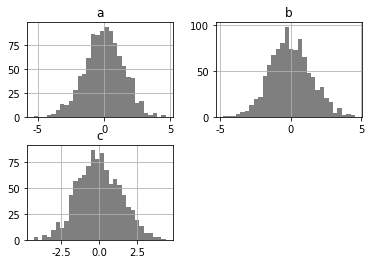

In [131]:
df4[["a", "b", "c"]].diff().hist(color = "k", alpha = 0.5, bins = 30)

In [132]:
data = pd.Series(np.random.randn(1000))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

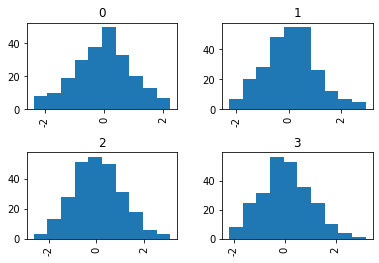

In [133]:
data.hist(by = np.random.randint(0, 4, 1000), figsize = (6, 4))
# 카테고리별 구분

In [134]:
data = pd.DataFrame({"a" : np.random.randn(1000), 
                     "b" : np.random.randint(0, 4, 1000)})
data.head()

,a,b
0,-0.064693,2
1,-0.897889,2
2,-0.939090,3
3,-3.889253,1
4,1.052592,3


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

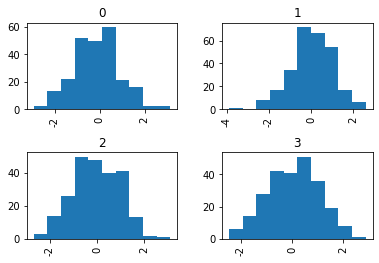

In [135]:
data["a"].hist(by = data["b"], figsize= (6, 4))

In [136]:
df = pd.DataFrame(np.random.rand(10, 5), 
                  columns = list("ABCDE")) 
print(df.head())
print(df.describe())

          A         B         C         D         E
0  0.813532  0.112791  0.831446  0.467760  0.537301
1  0.280978  0.283210  0.690175  0.754582  0.107130
2  0.917771  0.251409  0.707220  0.090878  0.807466
3  0.856465  0.048012  0.887948  0.921230  0.408433
4  0.960888  0.258830  0.159494  0.080229  0.082486
               A          B          C          D          E
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean    0.541995   0.439254   0.631230   0.515239   0.482511
std     0.348216   0.296990   0.248184   0.313805   0.271002
min     0.057227   0.048012   0.159494   0.080229   0.082486
25%     0.227405   0.253265   0.559656   0.275048   0.319046
50%     0.582950   0.372326   0.691793   0.509613   0.531310
75%     0.845732   0.669461   0.800390   0.739107   0.581062
max     0.960888   0.883311   0.887948   0.922592   0.917679


<AxesSubplot:>

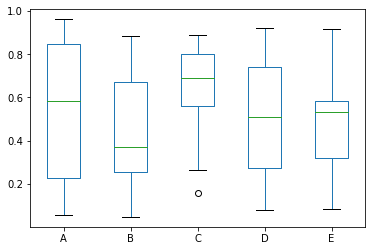

In [137]:
df.plot.box()

In [142]:
color = {"boxes" : "DarkGreen", "whiskers" : "DarkOrange", 
         "medians" : "DarkBlue", "caps" : "Gray"}

<AxesSubplot:>

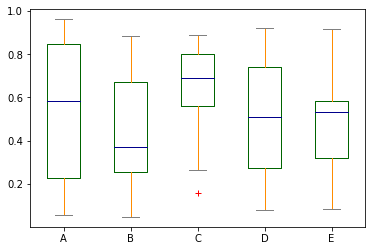

In [143]:
df.plot.box(color = color, sym = "r+")
# color에 담아둔 키값에 맞게 색상 적용
# sym : symbol. red, +형태로 표현

<AxesSubplot:>

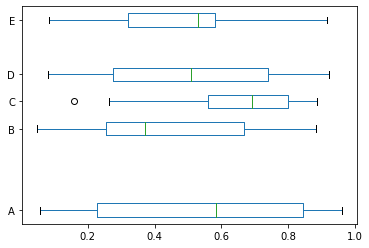

In [145]:
df.plot.box(vert = False, positions = [1, 4, 5, 6, 8])
# vert = False : 수직 false. 수평으로 표현
# 1, 4, 5, 6, 8 위치에 플랏을 그림

In [146]:
df = pd.DataFrame(np.random.rand(10, 5))
df.head()

,0,1,2,3,4
0,0.192481,0.122409,0.976472,0.252371,0.969580
1,0.926775,0.454856,0.445890,0.072282,0.825501
2,0.966086,0.147856,0.449469,0.563317,0.339629
3,0.935246,0.433823,0.224293,0.807699,0.837051
4,0.793398,0.360440,0.909622,0.377230,0.215175


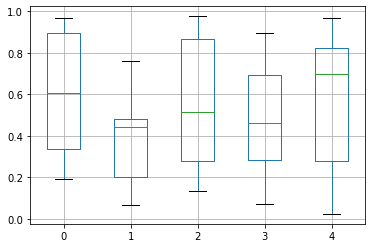

In [152]:
dp = df.boxplot()
# df.boxplot() : gird 나타나게 그림

In [153]:
df = pd.DataFrame(np.random.rand(10, 2), columns = ["Col1", "Col2"])
df.head()

,Col1,Col2
0,0.753546,0.630623
1,0.614275,0.994608
2,0.339105,0.925545
3,0.617433,0.606144
4,0.270219,0.241297


In [154]:
df["X"] = pd.Series(list("AAAAABBBBB"))
df.head()

,Col1,Col2,X
0,0.753546,0.630623,A
1,0.614275,0.994608,A
2,0.339105,0.925545,A
3,0.617433,0.606144,A
4,0.270219,0.241297,A


array([<AxesSubplot:title={'center':'Col1'}, xlabel='[X]'>,
       <AxesSubplot:title={'center':'Col2'}, xlabel='[X]'>], dtype=object)

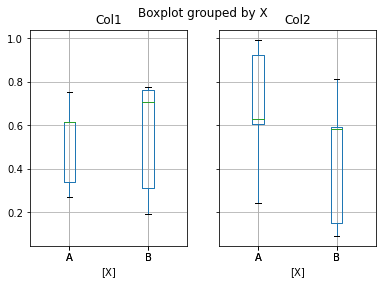

In [155]:
df.boxplot(by = "X")

In [156]:
np.random.seed(1234)
# seed 값 주어 난수 고정

In [157]:
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box.head()

,0,1
0,0.471435,-1.190976
1,1.432707,-0.312652
2,-0.720589,0.887163
3,0.859588,-0.636524
4,0.015696,-2.242685


In [158]:
df_box["g"] = np.random.choice(["A", "B"], size = 50)
df_box["g"].head()

0    A
1    A
2    B
3    A
4    B
Name: g, dtype: object

In [159]:
df_box.loc[df_box["g"] == "B", 1] += 3

array([<AxesSubplot:title={'center':'0'}, xlabel='[g]'>,
       <AxesSubplot:title={'center':'1'}, xlabel='[g]'>], dtype=object)

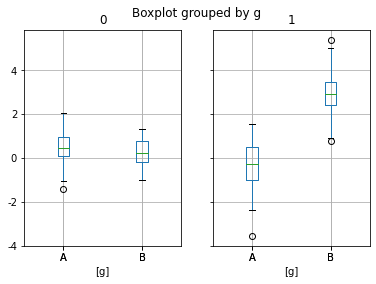

In [160]:
df_box.boxplot(by = "g")

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

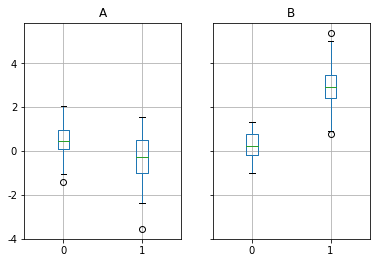

In [162]:
# 위와 같은 결과
df_box.groupby("g").boxplot()

In [163]:
df = pd.DataFrame(np.random.rand(10, 4), columns = list("abcd"))
df.head()

,a,b,c,d
0,0.556895,0.084774,0.333002,0.728429
1,0.142435,0.552469,0.273043,0.974495
2,0.667787,0.255653,0.108311,0.776181
3,0.782478,0.761604,0.914403,0.658623
4,0.568368,0.201756,0.698296,0.952195


<AxesSubplot:>

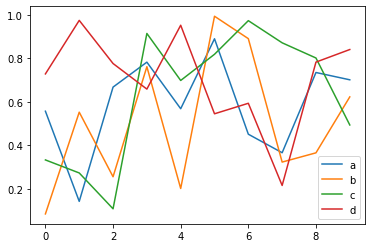

In [164]:
df.plot()
# line

<AxesSubplot:>

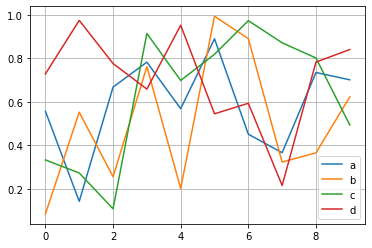

In [165]:
# 격자
df.plot(grid = True)

<AxesSubplot:>

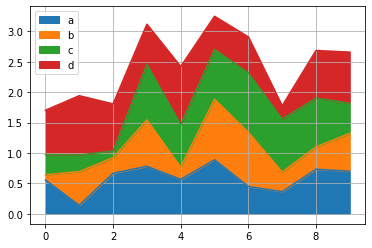

In [166]:
df.plot.area(grid = True)

<AxesSubplot:>

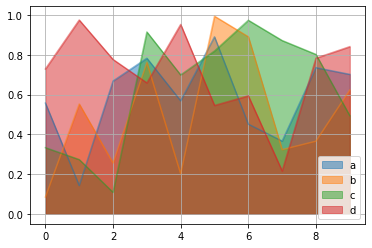

In [167]:
df.plot.area(stacked = False, grid = True)
# stacked default True